<a href="https://colab.research.google.com/github/kristinkx/Python_Projects/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('dark_background')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12 , 8)  # adjusts the configuration of the plots we will create

In [154]:
# upload the data from local drive
from google.colab import files
uploaded = files.upload()

Saving HousingData.csv to HousingData (5).csv


In [155]:
# The Boston housing dataset contains 506 observations and 14 variables

# CRIM: per capita crime rate by town
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS: proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: nitric oxides concentration (parts per 10 million)
# RM: average number of rooms per dwelling
# AGE: proportion of owner-occupied units built prior to 1940
# DIS: weighted distances to ﬁve Boston employment centers
# RAD: index of accessibility to radial highways
# TAX: full-value property-tax rate per $10,000.
# PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
# LSTAT: Lower status of the population.
# MEDV: Median value of owner-occupied homes in $1000s

In [156]:
boston = pd.read_csv("HousingData.csv")

In [157]:
# show column names
display(boston.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [158]:
# shoe first 5 records
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [159]:
# show number of columns and rows
boston.shape

(506, 14)

In [160]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [161]:
# check null values; multiple columns have null values
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [162]:
# different way to check missing data using a for loop
# result consistent with the info() method above

for col in boston.columns:
    pct_missing = np.mean(boston[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

CRIM - 0.039525691699604744%
ZN - 0.039525691699604744%
INDUS - 0.039525691699604744%
CHAS - 0.039525691699604744%
NOX - 0.0%
RM - 0.0%
AGE - 0.039525691699604744%
DIS - 0.0%
RAD - 0.0%
TAX - 0.0%
PTRATIO - 0.0%
B - 0.0%
LSTAT - 0.039525691699604744%
MEDV - 0.0%


In [163]:
# there are 6 columns have null values; 
# replace the nulls with the avg values in the column

boston["CRIM"].fillna(boston["CRIM"].mean(),inplace = True)
boston["ZN"].fillna(boston["ZN"].mean(),inplace = True)
boston["INDUS"].fillna(boston["INDUS"].mean(),inplace = True)
boston["CHAS"].fillna(boston["CHAS"].mean(),inplace = True)
boston["AGE"].fillna(boston["AGE"].mean(),inplace = True)
boston["LSTAT"].fillna(boston["LSTAT"].mean(),inplace = True)

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [164]:
# check data again - now there is no null data
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [165]:
# correlation between the property tax and accessibility to radial highways
boston['RAD'].corr(boston['TAX'])

0.9102281885331835

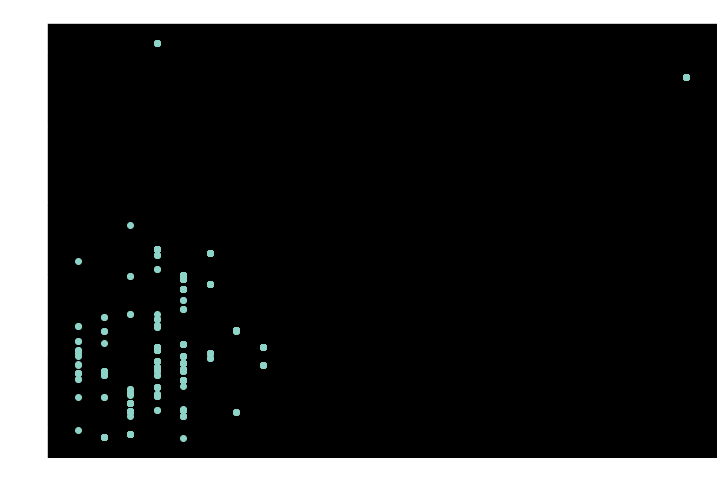

In [166]:
# show correlation between MEDV and CRIM 
plt.scatter(x = boston['RAD'], y = boston['TAX']) 
plt.title ('Accessiblity of Highways vs. Property Tax')
plt.xlabel('Accessibility of Radial Highways')
plt.ylabel('Property Tax')
plt.show()

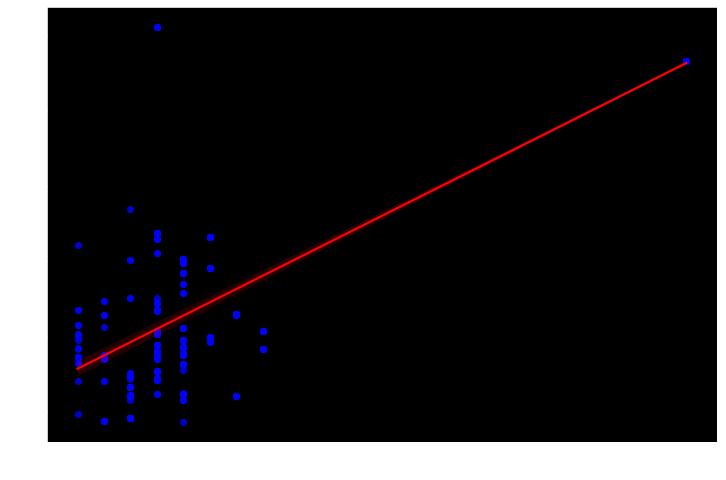

In [167]:
# use seaborn to show the strong positive correlation
sns.regplot(x = 'RAD', y = 'TAX', data = boston, scatter_kws={"color": 'blue'}, line_kws = {'color': "red"});

In [168]:
# correlation between the property tax and the crime rate
boston['MEDV'].corr(boston['CRIM'])

-0.3796954729460308

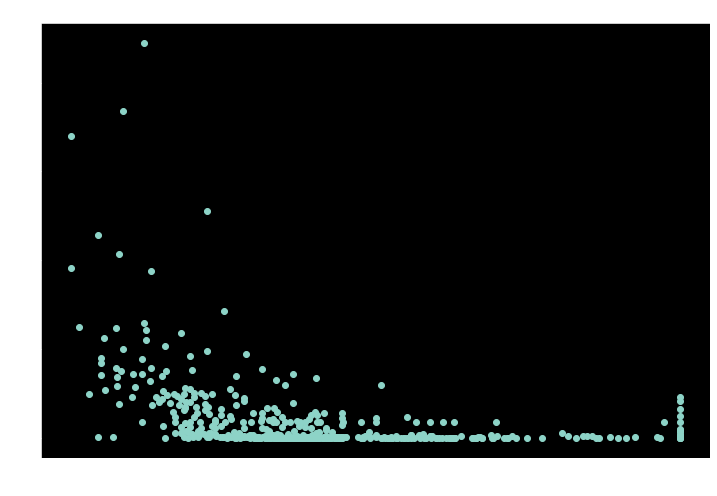

In [169]:
# show correlation between MEDV and CRIM 
plt.scatter(x = boston['MEDV'], y = boston['CRIM']) 
plt.title ('Crime Rate vs. Median Value of Homes')
plt.xlabel('Median value of owner-occupied homes in $1000s')
plt.ylabel('Per Capita Crime Rate')
plt.show()

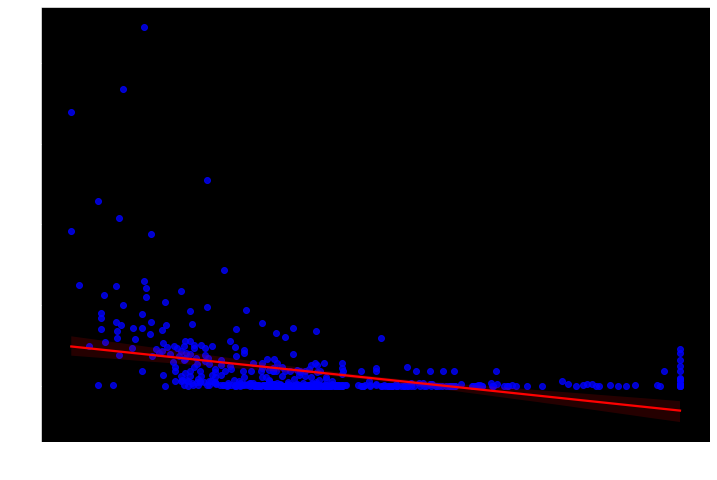

In [170]:
# use seaborn to show the negative correlation
sns.regplot(x = 'MEDV', y = 'CRIM', data = boston, scatter_kws={"color": 'blue'}, line_kws = {'color': "red"});

In [171]:
# find out the correlations
boston.corr(method = 'pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


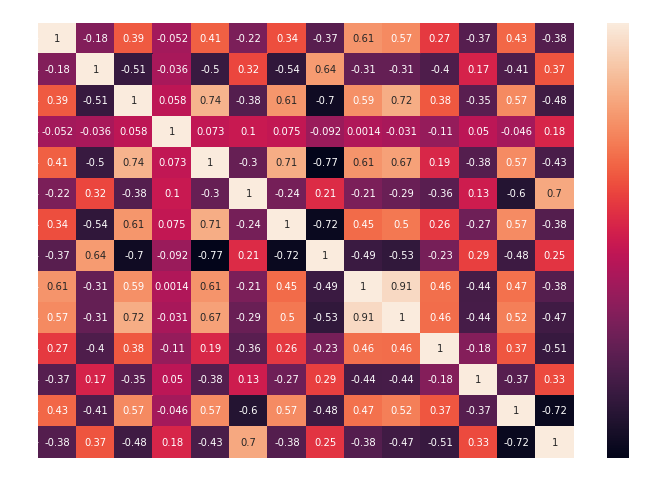

In [172]:
# use heatmap to demonstration correlation; brighter colors mean higher corr
correlation_matrix = boston.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title ('Correlation Matric for Numeric Features ')
plt.xlabel('Housing Indicators')
plt.ylabel('Housing Indicators')
plt.show()

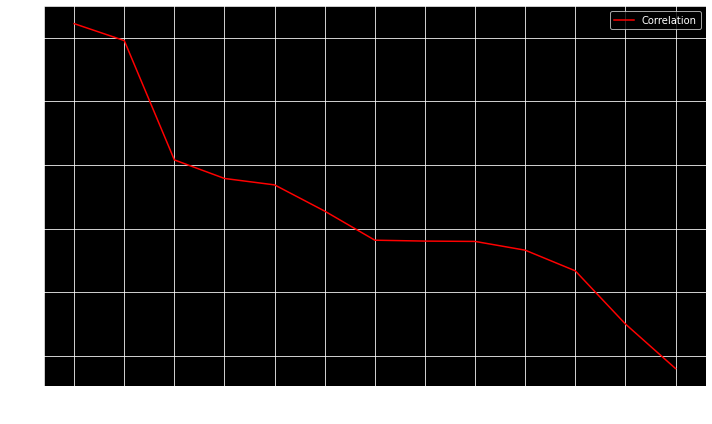

In [173]:
# map the correlation between median value of owner-occupied house and other indicators
correlation1 = abs(boston.corr())
plt.figure(figsize=(10,6))
plt.plot(correlation1["MEDV"].sort_values(ascending=False)[1:],label="Correlation",color="red")
plt.ylabel("Correlation")
plt.xlabel("Boston Housing Data Indicators")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [174]:
correlation_matrix = boston.corr()
corr_pairs = correlation_matrix.unstack()

# pair up the correlations
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

NOX    DIS     -0.769230
DIS    NOX     -0.769230
AGE    DIS     -0.724353
DIS    AGE     -0.724353
LSTAT  MEDV    -0.721975
                  ...   
CHAS   CHAS     1.000000
INDUS  INDUS    1.000000
ZN     ZN       1.000000
LSTAT  LSTAT    1.000000
MEDV   MEDV     1.000000
Length: 196, dtype: float64

In [175]:
# find high correlations (arbitrarily decide high correlation > 0.5)

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

AGE      TAX        0.500589
TAX      AGE        0.500589
         LSTAT      0.524545
LSTAT    TAX        0.524545
CRIM     TAX        0.566528
TAX      CRIM       0.566528
INDUS    LSTAT      0.567354
LSTAT    INDUS      0.567354
         NOX        0.572379
NOX      LSTAT      0.572379
LSTAT    AGE        0.574893
AGE      LSTAT      0.574893
RAD      INDUS      0.593176
INDUS    RAD        0.593176
RAD      CRIM       0.608886
CRIM     RAD        0.608886
RAD      NOX        0.611441
NOX      RAD        0.611441
AGE      INDUS      0.614592
INDUS    AGE        0.614592
ZN       DIS        0.638388
DIS      ZN         0.638388
NOX      TAX        0.668023
TAX      NOX        0.668023
MEDV     RM         0.695360
RM       MEDV       0.695360
AGE      NOX        0.711461
NOX      AGE        0.711461
TAX      INDUS      0.716062
INDUS    TAX        0.716062
         NOX        0.740965
NOX      INDUS      0.740965
RAD      TAX        0.910228
TAX      RAD        0.910228
CRIM     CRIM 

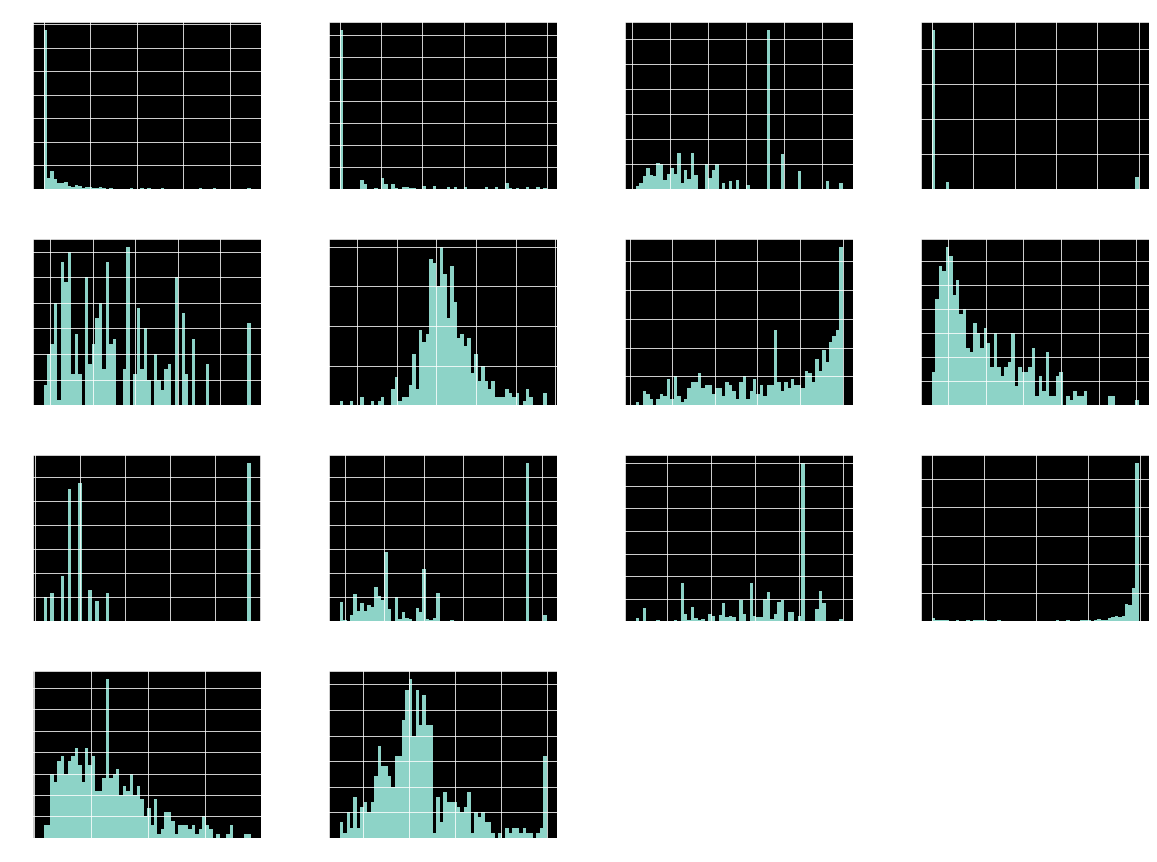

In [176]:
# plotting histogram

boston.hist(bins=60, figsize=(20, 15)); 